In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saraa1z","key":"c15ae290af9ccd1301d4eb84408fd746"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 apartment-rental-offers-in-germany.zip  'kaggle (1).json'   sample_data
 files					  kaggle.json


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df=pd.read_csv('/content/files/immo_data.csv')

In [8]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [9]:
df.shape

(268850, 49)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
#storing df for 2 last tasks
TMPdf = df.copy()

# TASK 1

checking for missing values , outliers and duplicates

In [12]:
start = time.time()
nullPrcnt = df.isnull().sum()/df.shape[0] * 100
print('run time : ' , (time.time() - start)) 
nullPrcnt.sort_values(ascending=True)

run time :  0.6603949069976807


regio1                       0.000000
regio3                       0.000000
regio2                       0.000000
livingSpaceRange             0.000000
garden                       0.000000
noRoomsRange                 0.000000
noRooms                      0.000000
geo_plz                      0.000000
baseRentRange                0.000000
lift                         0.000000
street                       0.000000
geo_krs                      0.000000
livingSpace                  0.000000
baseRent                     0.000000
cellar                       0.000000
geo_bln                      0.000000
date                         0.000000
balcony                      0.000000
scoutId                      0.000000
newlyConst                   0.000000
hasKitchen                   0.000000
picturecount                 0.000000
pricetrend                   0.681421
serviceCharge                2.569834
description                  7.344988
telekomTvOffer              12.132788
telekomUploa

In [13]:
start = time.time()
nullCol = df.columns[nullPrcnt > 30]
print('run time : ' , (time.time() - start)) 
nullCol

run time :  0.0007059574127197266


Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'interiorQual',
       'petsAllowed', 'thermalChar', 'numberOfFloors', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [14]:
df = df.drop(columns = nullCol)
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'street', 'streetPlain', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'floor',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'date'],
      dtype='object')

In [15]:
df.shape

(268850, 38)

In [16]:
# Deleting rows without totalRent data
start = time.time()
df.dropna(subset = ["totalRent"], inplace = True)
df.reset_index(drop = True, inplace = True)
print('run time : ' , (time.time() - start)) 
df.shape

run time :  0.19289493560791016


(228333, 38)

In [17]:
# Deleting columns without useful data
delCol=['facilities','description','street','geo_bln','geo_krs','geo_plz','scoutId','telekomTvOffer','regio3','noRoomsRange','picturecount','date','houseNumber','yearConstructedRange']
df = df.drop(columns = delCol)
df.shape

(228333, 24)

In [18]:
# checking for dublicated rows
df.duplicated().value_counts()

False    226336
True       1997
dtype: int64

In [19]:
df.drop_duplicates(inplace=True)
df.shape

(226336, 24)

In [20]:
# filling rest null numeric data by mean of each column
start = time.time()
df.fillna(df._get_numeric_data().mean(),inplace = True)
print('run time : ' , (time.time() - start)) 
df.isnull().sum()

run time :  0.06121993064880371


regio1                    0
serviceCharge             0
heatingType           36423
newlyConst                0
balcony                   0
pricetrend                0
telekomUploadSpeed        0
totalRent                 0
yearConstructed           0
firingTypes           48026
hasKitchen                0
cellar                    0
baseRent                  0
livingSpace               0
condition             56554
streetPlain           53662
lift                      0
baseRentRange             0
typeOfFlat            30236
noRooms                   0
floor                     0
garden                    0
livingSpaceRange          0
regio2                    0
dtype: int64

In [21]:
# filling null categorical data with most common class
start = time.time()
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
print('run time : ' , (time.time() - start)) 
df.isnull().sum()

run time :  0.7807116508483887


regio1                0
serviceCharge         0
heatingType           0
newlyConst            0
balcony               0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
yearConstructed       0
firingTypes           0
hasKitchen            0
cellar                0
baseRent              0
livingSpace           0
condition             0
streetPlain           0
lift                  0
baseRentRange         0
typeOfFlat            0
noRooms               0
floor                 0
garden                0
livingSpaceRange      0
regio2                0
dtype: int64

In [22]:
df

,regio1,serviceCharge,heatingType,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,...,condition,streetPlain,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,livingSpaceRange,regio2
0,Nordrhein_Westfalen,245.0,central_heating,False,False,4.62,10.000000,840.00,1965.000000,oil,...,well_kept,Schüruferstraße,False,4,ground_floor,4.0,1.000000,True,4,Dortmund
1,Sachsen,255.0,floor_heating,True,True,2.72,2.400000,1300.00,2019.000000,gas,...,first_time_use,Turnerweg,True,6,apartment,3.0,3.000000,False,4,Dresden
2,Bremen,138.0,self_contained_central_heating,False,True,2.46,28.915284,903.00,1950.000000,gas,...,refurbished,Hermann-Henrich-Meier-Allee,False,5,apartment,3.0,1.000000,False,4,Bremen
3,Sachsen,70.0,self_contained_central_heating,False,False,1.01,2.400000,380.00,1965.611479,gas,...,fully_renovated,Am_Bahnhof,False,2,apartment,2.0,1.000000,True,3,Mittelsachsen_Kreis
4,Bremen,88.0,central_heating,False,True,1.89,2.400000,584.25,1959.000000,gas:electricity,...,well_kept,Lesumer_Heerstr.,False,3,ground_floor,3.0,2.129003,False,2,Bremen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228328,Nordrhein_Westfalen,80.0,gas_heating,False,False,2.58,2.400000,670.00,1965.611479,gas,...,first_time_use_after_refurbishment,Hauptstraße,False,4,roof_storey,3.0,3.000000,False,4,Essen
228329,Bayern,90.0,heat_pump,False,True,2.74,10.000000,910.00,2016.000000,geothermal,...,mint_condition,Hauptstraße,False,6,roof_storey,3.0,2.129003,False,4,Weilheim_Schongau_Kreis
228330,Hessen,220.0,gas_heating,False,True,6.49,28.915284,1150.00,1983.000000,gas,...,well_kept,Hauptstraße,False,6,apartment,3.5,1.000000,False,5,Bergstraße_Kreis
228331,Hessen,220.0,central_heating,False,True,2.90,40.000000,930.00,1965.000000,gas,...,well_kept,Emsbachstrasse,False,5,apartment,4.0,1.000000,True,4,Limburg_Weilburg_Kreis


In [23]:
# check outliers using IQR
start = time.time()
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        Q1 = df[cols].quantile(0.2)
        Q3 = df[cols].quantile(0.8)
        IQR = Q3 - Q1
        res = df[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))].index
        df = df.drop(res)

print('run time : ' , (time.time() - start)) 
df.shape

run time :  0.9893417358398438


(203102, 24)

# TASK 2

Exploratory Data Analysis 




In [24]:
df.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,baseRentRange,noRooms,floor,livingSpaceRange
count,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000,203102.000000
mean,138.741266,3.251338,28.917761,710.750478,1967.214449,553.056249,67.664356,3.437760,2.493041,2.002013,2.833453
std,62.807085,1.867940,15.237750,340.813059,32.524699,301.479939,23.200894,1.973092,0.836426,1.215736,1.165348
min,0.000000,-2.940000,1.000000,0.000000,1883.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000
25%,95.000000,1.920000,10.000000,457.000000,1958.000000,325.000000,52.500000,2.000000,2.000000,1.000000,2.000000
50%,130.000000,3.300000,40.000000,610.000000,1965.611479,455.000000,65.000000,3.000000,2.500000,2.000000,3.000000
75%,175.000000,4.450000,40.000000,892.255000,1990.000000,710.000000,81.000000,5.000000,3.000000,3.000000,4.000000
max,369.380000,9.520000,40.000000,1968.060000,2029.000000,1585.000000,145.160000,8.000000,4.500000,6.000000,6.000000


In [25]:
df['regio1'].value_counts()

Sachsen                   47949
Nordrhein_Westfalen       47436
Sachsen_Anhalt            16510
Bayern                    14976
Hessen                    12019
Niedersachsen             11274
Baden_Württemberg         11244
Thüringen                  6812
Berlin                     6102
Brandenburg                5967
Rheinland_Pfalz            5899
Mecklenburg_Vorpommern     5629
Schleswig_Holstein         5410
Hamburg                    2585
Bremen                     2372
Saarland                    918
Name: regio1, dtype: int64

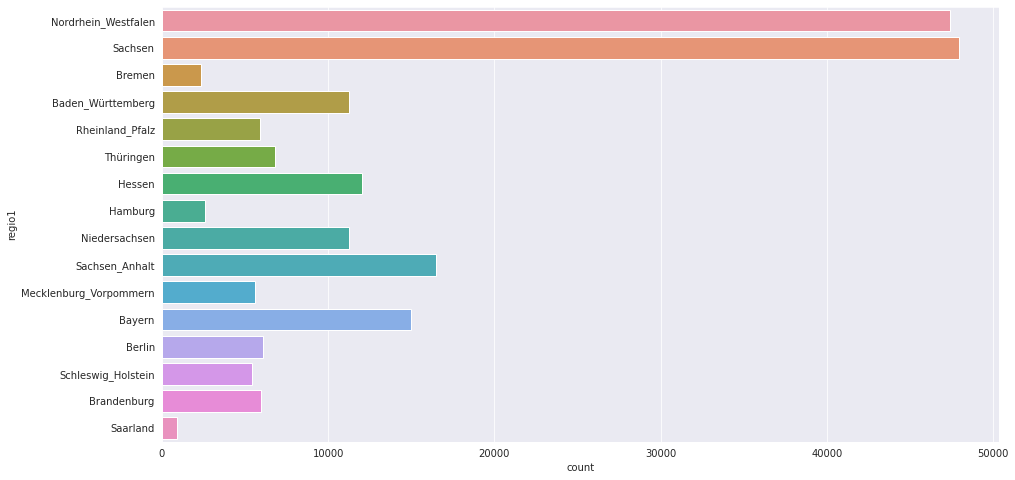

In [26]:
# num of rental ads for each bundesland
sns.set({'figure.figsize':(15,8)})
sns.countplot(y="regio1", data=df)

In [27]:
df['regio2'].value_counts()

Leipzig                         11132
Chemnitz                        10793
Berlin                           6102
Dresden                          5684
Magdeburg                        4271
                                ...  
Schweinfurt_Kreis                  22
Freyung_Grafenau_Kreis             21
Haßberge_Kreis                     18
Neustadt_a.d._Waldnaab_Kreis       11
Kronach_Kreis                       7
Name: regio2, Length: 419, dtype: int64

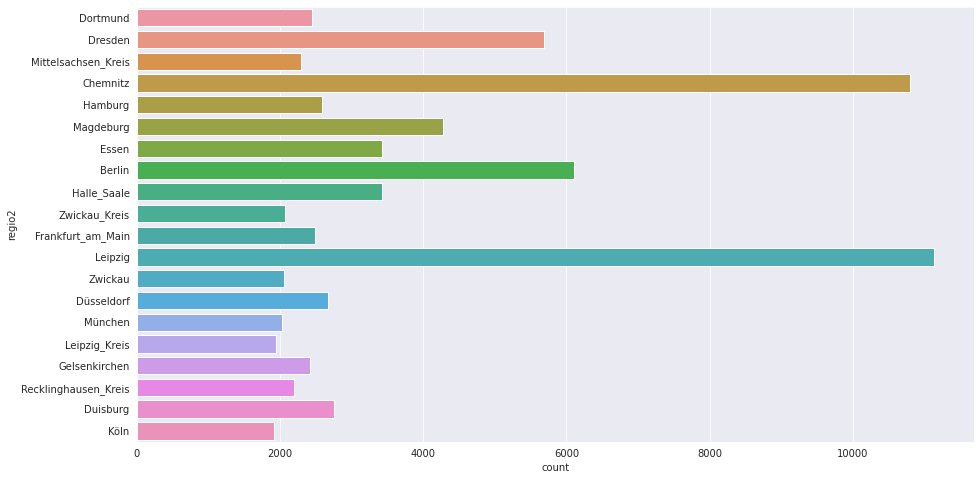

In [28]:
# num of rental ads for top 20 frequent district
top20 = df['regio2'].value_counts().keys()[0:20]
selected = df[df['regio2'].isin(top20)]
sns.countplot(y= 'regio2' , data=selected)

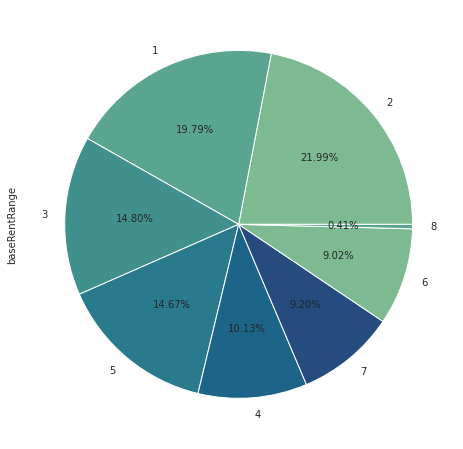

In [29]:
color = sns.color_palette("crest")
df.baseRentRange.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

In [30]:
df['firingTypes'].value_counts()

gas                                                                                                                                                                                            127640
district_heating                                                                                                                                                                                36556
oil                                                                                                                                                                                             13592
natural_gas_light                                                                                                                                                                                7979
electricity                                                                                                                                                                                      3576
          

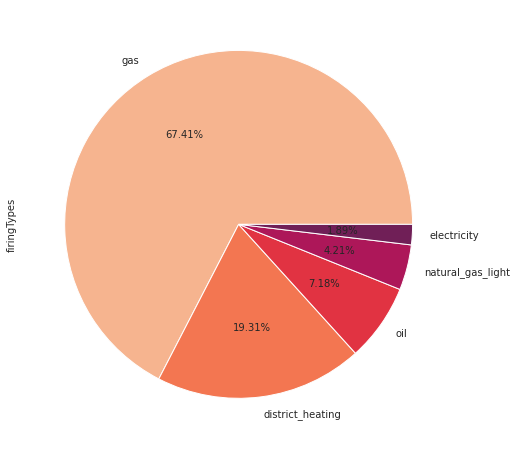

In [31]:
# percentage of top 5 firing types in houses
top5 = df['firingTypes'].value_counts().keys()[0:5]
selectedtype = df[df['firingTypes'].isin(top5)]
color = sns.color_palette("rocket_r")
selectedtype.firingTypes.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

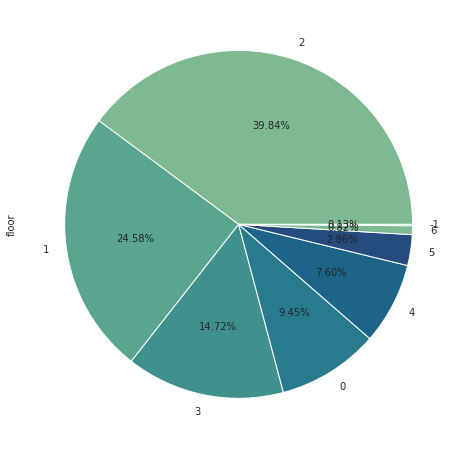

In [32]:
intFloor= df.astype({'floor':'int'})
color = sns.color_palette("crest")
intFloor.floor.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

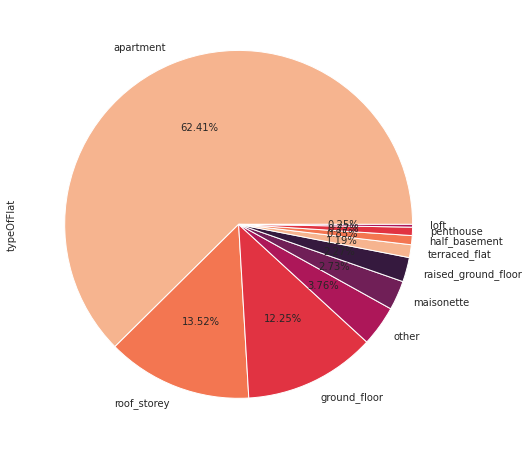

In [33]:
color = sns.color_palette("rocket_r")
df.typeOfFlat.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

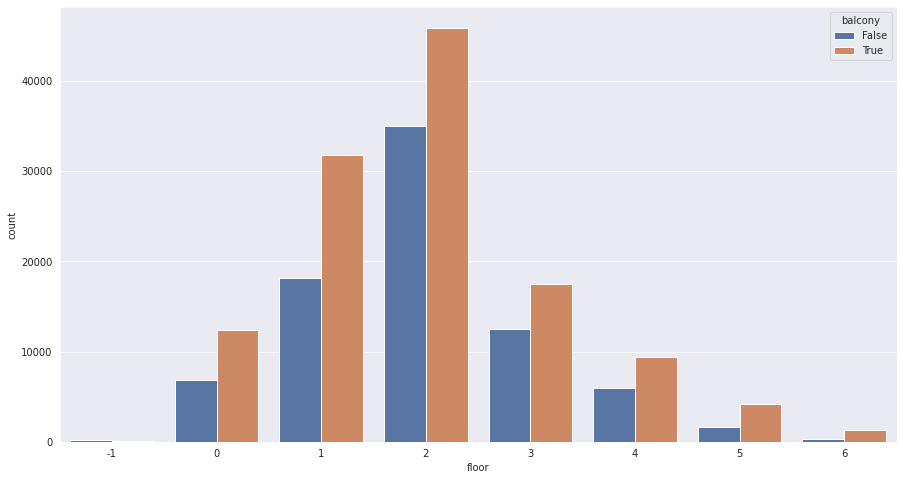

In [34]:
sns.set({'figure.figsize':(15,8)})
sns.countplot(x="floor", hue="balcony", data=intFloor)

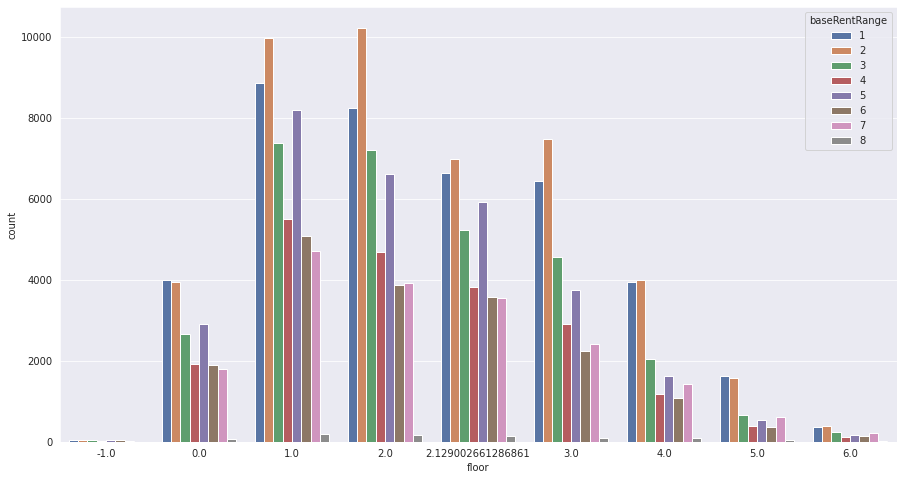

In [35]:
sns.countplot(x="floor", hue="baseRentRange", data=df)

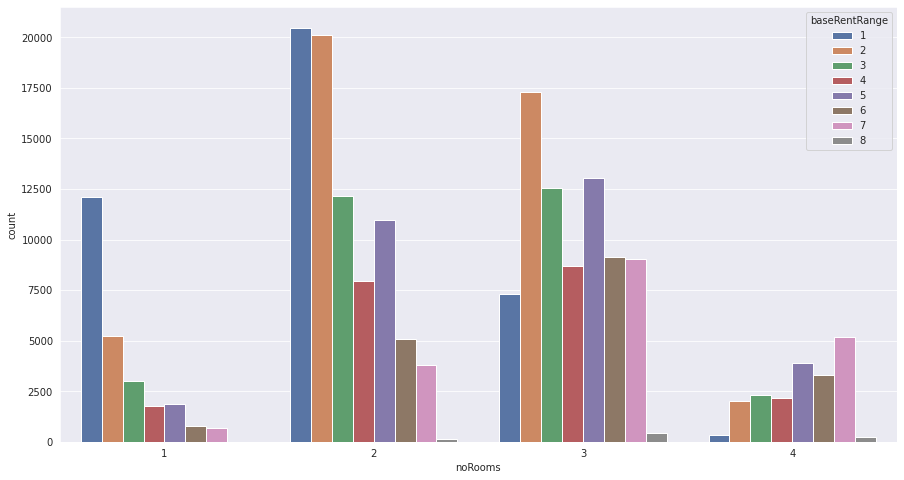

In [36]:
intRooms = df.astype({'noRooms':'int'})
sns.countplot(x="noRooms", hue="baseRentRange", data=intRooms)

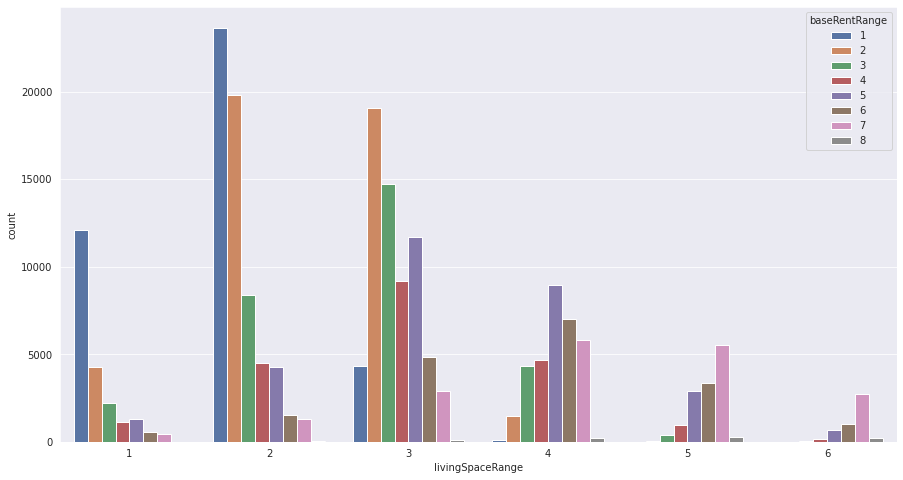

In [37]:
sns.countplot(x="livingSpaceRange", hue="baseRentRange", data=df)

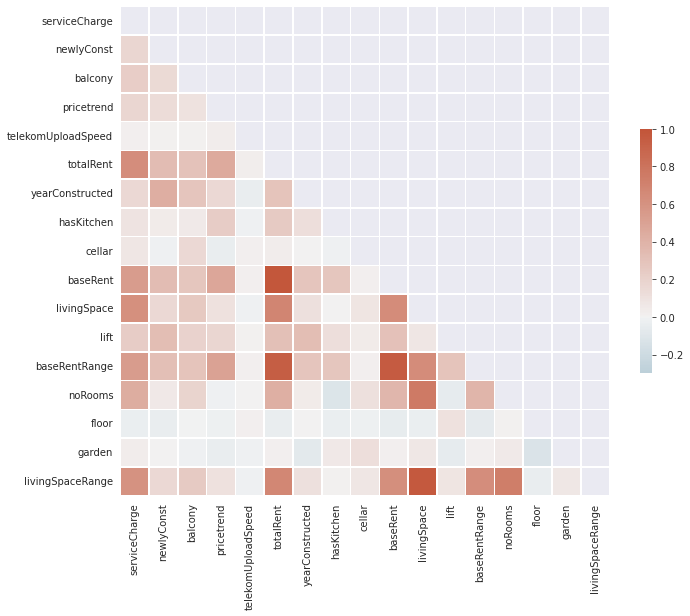

In [38]:
#sns.set_theme(style="white")
rs = np.random.RandomState(20)
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1 , vmin = -.3 , center= 0 , square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# TASK 3

model training

In [39]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'firingTypes', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'noRooms', 'floor', 'garden', 'livingSpaceRange', 'regio2'],
      dtype='object')

In [40]:
df.shape

(203102, 24)

In [41]:
df1 = df.copy()

In [42]:
X=df1.drop(['baseRentRange' , 'baseRent' , 'totalRent'], axis=1)
y=df1['totalRent']

In [43]:
numericalColumns = []
for cols in X.columns:
    if X[cols].dtype == 'int64' or X[cols].dtype == 'float64':
        numericalColumns.append(cols)
        
numericalColumns

['serviceCharge',
 'pricetrend',
 'telekomUploadSpeed',
 'yearConstructed',
 'livingSpace',
 'noRooms',
 'floor',
 'livingSpaceRange']

In [44]:
catColumns = []
for cols in X.columns:
    if X[cols].dtype == 'object' or X[cols].dtype == 'bool':
        catColumns.append(cols)
        
catColumns

['regio1',
 'heatingType',
 'newlyConst',
 'balcony',
 'firingTypes',
 'hasKitchen',
 'cellar',
 'condition',
 'streetPlain',
 'lift',
 'typeOfFlat',
 'garden',
 'regio2']

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X[numericalColumns] = std.fit_transform(X[numericalColumns])
X[numericalColumns]

,serviceCharge,pricetrend,telekomUploadSpeed,yearConstructed,livingSpace,noRooms,floor,livingSpaceRange
0,1.691831,0.732714,-1.241509,-0.068085,0.790301,1.801668,-0.824205,1.001031
1,1.851049,-0.284452,-1.740272,1.592195,0.695477,0.606102,0.820894,1.001031
2,-0.011802,-0.423643,-0.000163,-0.529274,0.745906,0.606102,-0.824205,1.001031
3,-1.094485,-1.199902,-1.740272,-0.049285,-0.244144,-0.589463,-0.824205,0.142916
4,-0.807893,-0.728793,-1.740272,-0.252561,-0.317418,0.606102,0.104456,-0.715199
...,...,...,...,...,...,...,...,...
228328,-0.935267,-0.359401,-1.740272,-0.049285,0.747199,0.606102,0.820894,1.001031
228329,-0.776049,-0.273745,-1.241509,1.499958,0.962709,0.606102,0.104456,1.001031
228330,1.293786,1.733819,-0.000163,0.485342,2.040256,1.203885,-0.824205,1.859146
228331,1.293786,-0.188089,0.727290,-0.068085,1.178218,1.801668,-0.824205,1.001031


In [46]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X[catColumns] = ord_enc.fit_transform(X[catColumns])
X[catColumns]

,regio1,heatingType,newlyConst,balcony,firingTypes,hasKitchen,cellar,condition,streetPlain,lift,typeOfFlat,garden,regio2
0,9.0,0.0,0.0,0.0,75.0,0.0,1.0,9.0,38102.0,0.0,1.0,1.0,79.0
1,12.0,4.0,1.0,1.0,33.0,0.0,1.0,0.0,41539.0,1.0,0.0,0.0,80.0
2,4.0,9.0,0.0,1.0,33.0,0.0,0.0,7.0,18862.0,0.0,0.0,0.0,49.0
3,12.0,9.0,0.0,0.0,33.0,0.0,1.0,2.0,1369.0,0.0,0.0,1.0,230.0
4,4.0,0.0,0.0,1.0,39.0,0.0,1.0,9.0,26467.0,0.0,1.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228328,9.0,5.0,0.0,0.0,33.0,0.0,0.0,1.0,17825.0,0.0,8.0,0.0,99.0
228329,1.0,6.0,0.0,1.0,52.0,0.0,1.0,3.0,17825.0,0.0,8.0,0.0,394.0
228330,6.0,5.0,0.0,1.0,33.0,1.0,0.0,9.0,17825.0,0.0,0.0,0.0,34.0
228331,6.0,0.0,0.0,1.0,33.0,0.0,1.0,9.0,11555.0,0.0,0.0,1.0,201.0


In [47]:
X.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,pricetrend,telekomUploadSpeed,yearConstructed,firingTypes,hasKitchen,...,livingSpace,condition,streetPlain,lift,typeOfFlat,noRooms,floor,garden,livingSpaceRange,regio2
0,9.0,1.691831,0.0,0.0,0.0,0.732714,-1.241509,-0.068085,75.0,0.0,...,0.790301,9.0,38102.0,0.0,1.0,1.801668,-0.824205,1.0,1.001031,79.0
1,12.0,1.851049,4.0,1.0,1.0,-0.284452,-1.740272,1.592195,33.0,0.0,...,0.695477,0.0,41539.0,1.0,0.0,0.606102,0.820894,0.0,1.001031,80.0
2,4.0,-0.011802,9.0,0.0,1.0,-0.423643,-0.000163,-0.529274,33.0,0.0,...,0.745906,7.0,18862.0,0.0,0.0,0.606102,-0.824205,0.0,1.001031,49.0
3,12.0,-1.094485,9.0,0.0,0.0,-1.199902,-1.740272,-0.049285,33.0,0.0,...,-0.244144,2.0,1369.0,0.0,0.0,-0.589463,-0.824205,1.0,0.142916,230.0
4,4.0,-0.807893,0.0,0.0,1.0,-0.728793,-1.740272,-0.252561,39.0,0.0,...,-0.317418,9.0,26467.0,0.0,1.0,0.606102,0.104456,0.0,-0.715199,49.0


In [48]:
#train and test split
train_size = int(0.8 * X.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
print(X_train.shape)
print(y_train.shape)

X_test = X[train_size:]
y_test = y[train_size:]
print(X_test.shape)
print(y_test.shape)

(162481, 21)
(162481,)
(40621, 21)
(40621,)


TRAINING LINEAR REGRESSION MODEL

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

,test,prediction
182294,579.0,533.208885
182295,899.0,1091.932552
182296,1075.0,722.737860
182298,660.0,826.278533
182299,490.0,742.998457
...,...,...
228328,670.0,702.481073
228329,910.0,857.348307
228330,1150.0,1336.678007
228331,930.0,933.169621


In [50]:
mean_absolute_error(y_test, y_pred)

122.12533110496716

In [51]:
LR_model.score(X_test, y_test)

0.7500971356707936

TRAINING POLYNOMIAL REGRESSION MODEL

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree= 3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred = polyreg.predict(X_test)
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

,test,prediction
182294,579.0,488.861439
182295,899.0,998.507913
182296,1075.0,998.722371
182298,660.0,838.479901
182299,490.0,713.385256
...,...,...
228328,670.0,667.832624
228329,910.0,883.663073
228330,1150.0,1347.262659
228331,930.0,962.225688


In [53]:
mean_absolute_error(y_test, y_pred)

106.28260763857207

In [54]:
polyreg.score(X_test, y_test)

0.8055974716618739

TRAINING Decision Tree MODEL

In [55]:
from sklearn.tree import DecisionTreeRegressor
Dtree_model = DecisionTreeRegressor(random_state=0 )
Dtree_model.fit(X_train,y_train)
y_pred = Dtree_model.predict(X_test)
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

,test,prediction
182294,579.0,505.00
182295,899.0,1273.50
182296,1075.0,680.00
182298,660.0,815.00
182299,490.0,419.39
...,...,...
228328,670.0,750.00
228329,910.0,897.00
228330,1150.0,1149.00
228331,930.0,700.00


In [56]:
mean_absolute_error(y_test, y_pred)

122.79363272691464

In [57]:
Dtree_model.score(X_test, y_test)

0.7016355607580336

In [58]:
from sklearn.tree import DecisionTreeRegressor
Dtree_modell = DecisionTreeRegressor(random_state=0 , max_depth= 10)

Dtree_modell.fit(X_train,y_train)
y_pred = Dtree_modell.predict(X_test)
print("mse : " ,mean_absolute_error(y_test, y_pred))
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

mse :  110.76938133318323


,test,prediction
182294,579.0,553.682775
182295,899.0,1011.888882
182296,1075.0,991.770833
182298,660.0,712.132745
182299,490.0,490.536817
...,...,...
228328,670.0,641.710855
228329,910.0,915.109605
228330,1150.0,1426.282766
228331,930.0,955.304907


In [59]:
Dtree_modell.score(X_test, y_test)

0.7836684105866972

In [60]:
Dtree_modelll = DecisionTreeRegressor(random_state=50 , max_depth= 1000 , max_leaf_nodes=1000)

Dtree_modelll.fit(X_train,y_train)
y_pred = Dtree_modelll.predict(X_test)
print("mse : " ,mean_absolute_error(y_test, y_pred))
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

mse :  106.01380233559455


,test,prediction
182294,579.0,572.045382
182295,899.0,1014.786714
182296,1075.0,1080.000000
182298,660.0,712.132745
182299,490.0,440.282289
...,...,...
228328,670.0,641.710855
228329,910.0,992.300656
228330,1150.0,1457.339778
228331,930.0,955.304907


In [61]:
Dtree_modelll.score(X_test, y_test)

0.7983181352877045

TRAINING XGBbooster

In [62]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor()

XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)
print("mse : " ,mean_absolute_error(y_test, y_pred))
result = pd.DataFrame({'test':y_test,'prediction':y_pred})
result

[19:02:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse :  99.8341544095153


,test,prediction
182294,579.0,505.964539
182295,899.0,1043.471802
182296,1075.0,1039.981079
182298,660.0,773.310059
182299,490.0,604.730103
...,...,...
228328,670.0,701.581482
228329,910.0,973.847534
228330,1150.0,1230.038208
228331,930.0,977.092712


In [63]:
XGB_model.score(X_test, y_test)

0.8263294862998971

# TASK 4 
MULTIPROCESSING

In [64]:
TMPdf1 = TMPdf.copy()

In [65]:
from multiprocessing import Pool , cpu_count
import time

In [66]:
n = cpu_count()
n

2

In [67]:
gpdf = TMPdf.groupby('baseRentRange')
type(gpdf)

pandas.core.groupby.generic.DataFrameGroupBy

In [68]:
def my_func(group):
  res = group.isnull().sum()/group.shape[0] * 100
  return res

In [69]:
start = time.time()
df_part = np.array_split(TMPdf, n)
pool = Pool(n)
res = pd.concat(pool.map( my_func , df_part))
pool.close()
pool.join()

print('run time : ' , (time.time() - start)) 
#df_part

run time :  3.7499678134918213


In [70]:
def fillNullCat(group):
  for col in group.columns:
    if group[col].dtype == 'object' or group[col].dtype == 'bool':
      mode = group[col].value_counts().head(1).index[0]
      group[col].fillna(mode, inplace = True)
  return group

with Pool(cpu_count()) as p:
    res_list = list(p.imap(fillNullCat, [group for _, group in gpdf]))

res_list[0]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,C,NaN,NaN,NaN,Oct19
10,Sachsen,88.00,central_heating,ONE_YEAR_FREE,NaN,False,True,11,0.21,40.0,...,Chemnitz,Sonnenberg,Gemütliche 2-Raum Wohnung in Chemnitz. komple...,Diese Wohnung wird komplett renoviert und nach...,NaN,C,NaN,NaN,NaN,Oct19
15,Thüringen,80.00,district_heating,ONE_YEAR_FREE,10.0,False,True,5,1.67,2.4,...,Weimar,Schöndorf,Schönes fünfgeschossiges Mehrfamilienhaus in ...,Die Wohnung verfügt über eine separate Küche m...,NaN,C,NaN,90.76,0.1915,Sep18
17,Sachsen,50.00,central_heating,ONE_YEAR_FREE,NaN,False,False,12,1.96,40.0,...,Mittelsachsen_Kreis,Döbeln,Vermietet wird eine gemütliche Wohnung mit zwe...,Diese Wohnung wird komplett renoviert und nach...,75.00,C,1996.0,90.76,0.2055,Sep18
27,Sachsen_Anhalt,147.32,district_heating,ONE_YEAR_FREE,NaN,False,True,14,1.08,40.0,...,Magdeburg,Kannenstieg,Das Objekt ist ruhig und grün gelegen. Der Auf...,Diese Wohnung wird komplett renoviert und nach...,54.39,C,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268820,Sachsen_Anhalt,130.00,central_heating,ONE_YEAR_FREE,NaN,False,False,3,3.23,40.0,...,Halle_Saale,Südliche_Innenstadt,Der 3 bis 4-geschossige Altbau wurde 1926 erba...,- PVC Belag in Holzoptik\r\n- modern geflieste...,NaN,D,NaN,NaN,NaN,May19
268825,Sachsen,104.00,central_heating,ONE_YEAR_FREE,NaN,False,True,2,0.36,40.0,...,Chemnitz,Kaßberg,Das Objekt ist ein hochwertig saniertes und de...,- moderner Grundriss\n- Laminat in den Wohnräu...,NaN,C,NaN,NaN,NaN,May19
268833,Sachsen,100.00,central_heating,ONE_YEAR_FREE,NaN,False,False,11,2.10,40.0,...,Görlitz_Kreis,Löbau,"Vermietet werden 3 Wohneinheiten im 1.OG, 2.OG...",- Teppichböden in den Wohnräumen\n- Eingangsbe...,NaN,C,NaN,NaN,NaN,Feb20
268842,Sachsen,140.00,central_heating,ONE_YEAR_FREE,NaN,False,False,7,0.54,40.0,...,Zwickau,Nordvorstadt,Das Objekt ist ein hochwertig saniertes und de...,Diese Wohnung wird komplett renoviert und nach...,0.00,C,NaN,NaN,NaN,Oct19


In [71]:
TMPdf = pd.concat(res_list)
TMPdf.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                      0
telekomTvOffer                   0
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                      0
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                      0
livingSpace                      0
geo_krs                          0
condition                        0
interiorQual                     0
petsAllowed                      0
street                           0
streetPlain                      0
lift                

# TASK5
DASK

In [72]:
!python -m pip install "dask[complete]"

In [73]:
import dask
import dask.dataframe as dd

In [74]:
ddf = dd.from_pandas(TMPdf1, npartitions=10)

In [75]:
ddf.partitions[0]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,object,float64,object,object,float64,bool,bool,int64,float64,float64,float64,float64,int64,float64,object,bool,object,bool,float64,float64,object,float64,object,object,object,object,object,object,bool,int64,object,int64,float64,float64,float64,float64,int64,bool,int64,object,object,object,object,float64,object,float64,float64,float64,object
26885,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [76]:
ddf.partitions[1]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26885,object,float64,object,object,float64,bool,bool,int64,float64,float64,float64,float64,int64,float64,object,bool,object,bool,float64,float64,object,float64,object,object,object,object,object,object,bool,int64,object,int64,float64,float64,float64,float64,int64,bool,int64,object,object,object,object,float64,object,float64,float64,float64,object
53770,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [77]:
s_time = time.time()
ddf.isnull().sum()/ddf.shape[0] * 100
print(f'run time : {time.time() - s_time}')

run time : 0.020147085189819336
